In [1]:
import numpy as np
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
import shap
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kr_helper_funcs as kr
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.1.0
tensorboard2.1.1
seaborn0.10.1
Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15535167444340474806,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6586313605
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17492937178905545231
 physical_device_desc: "device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:3a:00.0, compute capability: 7.5"]

In [2]:
image_shape =(250, 250, 3)
data_dir="../input/kaggle-flowers"
test_path= os.path.join(data_dir, 'test')
os.listdir(test_path)

test_gen = ImageDataGenerator(rescale =1./255)
batch_size=32
test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='categorical',  shuffle=False)
test_image_gen.class_indices



Found 750 images belonging to 5 classes.


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [3]:
# model.summary()

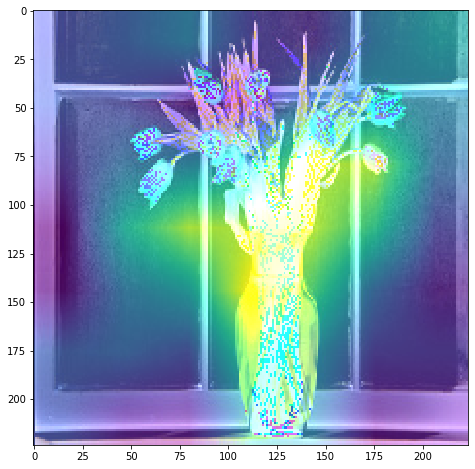

In [4]:
from tf_explain.core.grad_cam import GradCAM
# Load pretrained model or your own

# img_size=(250, 250)
# model = tf.keras.models.load_model('flowers')

img_size=(224, 224)
model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)


cat_image = test_path + '/tulip/' + os.listdir(test_path + '/tulip')[57]

# Load a sample image (or multiple ones)
img = tf.keras.preprocessing.image.load_img(cat_image, target_size=img_size)
img = tf.keras.preprocessing.image.img_to_array(img)
data = ([img], None)

# Start explainer
explainer = GradCAM()
# grid = explainer.explain(data, model, 0, image_weight=0.6)  # 281 is the tabby cat index in ImageNet

grid = explainer.explain(data, model, class_index=4, colormap=16)
# grid = explainer.get_gradients_and_filters(model, test_image_gen.next(), "max_pooling2d", 0) 
plt.figure(figsize=(8,8))
plt.imshow((grid))
# plt.imshow(imread(cat_image))
# explainer.save(grid, ".", "grad_cam.png")

In [5]:
help( GradCAM)

Help on class GradCAM in module tf_explain.core.grad_cam:

class GradCAM(builtins.object)
 |  Perform Grad CAM algorithm for a given input
 |  
 |  Paper: [Grad-CAM: Visual Explanations from Deep Networks
 |          via Gradient-based Localization](https://arxiv.org/abs/1610.02391)
 |  
 |  Methods defined here:
 |  
 |  explain(self, validation_data, model, class_index, layer_name=None, colormap=16, image_weight=0.7)
 |      Compute GradCAM for a specific class index.
 |      
 |      Args:
 |          validation_data (Tuple[np.ndarray, Optional[np.ndarray]]): Validation data
 |              to perform the method on. Tuple containing (x, y).
 |          model (tf.keras.Model): tf.keras model to inspect
 |          class_index (int): Index of targeted class
 |          layer_name (str): Targeted layer for GradCAM. If no layer is provided, it is
 |              automatically infered from the model architecture.
 |          colormap (int): OpenCV Colormap to use for heatmap visualizatio

In [6]:
explainer.infer_grad_cam_target_layer(model)

'block5_pool'

In [13]:
cat_image = test_path + '/tulip/' + os.listdir(test_path + '/tulip')[57]
sample_image = image.load_img(cat_image, target_size=(224, 224, 3))
sample_img_arr = image.img_to_array(sample_image)
sample_img_arr_expanded = np.expand_dims(sample_img_arr, axis =0)
output = explainer.get_gradients_and_filters(model, sample_img_arr_expanded, "block5_pool", 1)

In [34]:
# print(output[0])
print((output[1].numpy))

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1, 7, 7, 512), dtype=float32, numpy=
array([[[[-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
           0.0000000e+00, -0.0000000e+00,  0.0000000e+00],
         [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
           0.0000000e+00, -0.0000000e+00,  0.0000000e+00],
         [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
           0.0000000e+00, -0.0000000e+00,  0.0000000e+00],
         ...,
         [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
           0.0000000e+00, -0.0000000e+00,  0.0000000e+00],
         [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

        [[ 0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
           0.0000000e+00, -0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00, -0.00000

In [25]:
output[0][0].shape()

TypeError: 'TensorShape' object is not callable

In [ ]:
plt.imshow(imread(cat_image))